<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/camila_fnirs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento Toque Mãe-Estranha

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Gattering

Os dados já estão em termos de concentrações de HBO, HBD e HBT.

In [39]:
df = pd.read_excel("/content/drive/MyDrive/Mãe e Estranha - Arquivos .lob/HB.xlsx")
df.ss = df.ss.replace([1,2],["Mãe","Estranha"])
df.HB = df.HB.replace([1,2,3],["HBO","HBD","HBT"])
df.head()

,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,2,0.0000,0,0,HBO,0.0627,1.4062,-5.7999,4.0904,-0.4529,...,0.0997,0.3540,-0.6003,-0.5219,-0.0224,-0.0719,0.2158,-0.0007,-0.5355,-3.7367
1,2,0.1000,0,0,HBO,0.0651,1.4085,-6.2821,3.4950,-0.5226,...,-0.0045,0.2977,-0.6509,-0.5799,-0.0280,-0.0637,0.2133,-0.0045,-0.5319,-3.6511
2,2,0.2000,0,0,HBO,0.0667,1.4137,-6.7396,2.9324,-0.5910,...,-0.1078,0.2416,-0.7004,-0.6358,-0.0328,-0.0541,0.2117,-0.0087,-0.5283,-3.5768
3,2,0.3000,0,0,HBO,0.0657,1.4221,-7.1669,2.4111,-0.6588,...,-0.2090,0.1863,-0.7482,-0.6885,-0.0367,-0.0430,0.2115,-0.0140,-0.5250,-3.5175
4,2,0.4000,0,0,HBO,0.0610,1.4335,-7.5590,1.9390,-0.7263,...,-0.3075,0.1324,-0.7942,-0.7377,-0.0399,-0.0304,0.2128,-0.0209,-0.5223,-3.4762


## Selecionando somente dados de estímulos e centralizando a média


### Seleciona

In [40]:
channels_list = [x for x in df.columns if x[0] == 'S']

df = df[ df.ss != 0 ] # considera valores somente nos intervalos de estímulos de contato mão e estranha

# print(df.groupby(['subj','ss','HB'])[channels_list].mean().head())
print(df.groupby(['subj','ss'])[channels_list].mean().head())

               S1_D1 1  S1_D3 2  S1_D4 3  S1_D6 4  S2_D2 5  S2_D4 6  S2_D5 7  \
subj ss                                                                        
2    Estranha   0.4070  -0.5420   2.9896   0.0615   0.0662   0.2989   0.1204   
     Mãe       -0.3315   0.2048  -0.8472  -0.3187  -0.4710   0.5024  -0.0170   
4    Estranha   1.6279   5.9902   0.6863  -0.3440   0.0279  -0.3905  -0.4600   
     Mãe       -0.1562   6.6874  -0.6885   0.4924   0.0535   0.5731  -1.4864   
5    Estranha   0.6316  -0.3784   0.5072   1.5244   0.0303   0.2273  -0.2266   

               S2_D7 8  S3_D5 9  S3_D7 10  ...  S6_D10 19  S6_D12 20  \
subj ss                                    ...                         
2    Estranha   0.0128  -0.0645    0.0763  ...     0.0250     0.3058   
     Mãe        0.2903  -0.1863   -0.1854  ...     0.0075     0.1895   
4    Estranha   0.1012  -0.2572   -0.5807  ...     0.3858    -0.4937   
     Mãe        0.9205  -0.2138   -0.8158  ...    -0.1033    -0.4012   
5    Es

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Centraliza

In [66]:
df_norm = pd.DataFrame()

for subj in df.subj.unique():
#  for hb in df.HB.unique():
    for ss in df.ss.unique():
      # mask = (df.subj == subj) & (df.HB == hb) & (df.ss == ss)
      mask = (df.subj == subj) & (df.ss == ss)
      temp = df[ mask ].copy()

      for ch in channels_list:
        temp[ ch ] = temp[ ch ] - temp[ ch ].mean()

      df_norm = pd.concat([df_norm,temp])

pd.set_option('display.precision', 4)
# print(df_norm.groupby(['subj','ss','HB'])[channels_list].mean().head())
print(df_norm.groupby(['subj','ss'])[channels_list].mean().head())
pd.set_option('display.precision', 6)


               S1_D1 1  S1_D3 2  S1_D4 3  S1_D6 4  S2_D2 5  S2_D4 6  S2_D5 7  \
subj ss                                                                        
2    Estranha  -0.0000   0.0000  -0.0000   0.0000   0.0000  -0.0000   0.0000   
     Mãe       -0.0000   0.0000   0.0000  -0.0000   0.0000   0.0000  -0.0000   
4    Estranha   0.0000  -0.0000   0.0000   0.0000  -0.0000  -0.0000   0.0000   
     Mãe        0.0000   0.0000   0.0000   0.0000   0.0000  -0.0000  -0.0000   
5    Estranha  -0.0000  -0.0000   0.0000  -0.0000   0.0000   0.0000  -0.0000   

               S2_D7 8  S3_D5 9  S3_D7 10  ...  S6_D10 19  S6_D12 20  \
subj ss                                    ...                         
2    Estranha  -0.0000  -0.0000   -0.0000  ...    -0.0000    -0.0000   
     Mãe        0.0000  -0.0000   -0.0000  ...    -0.0000    -0.0000   
4    Estranha  -0.0000   0.0000   -0.0000  ...    -0.0000    -0.0000   
     Mãe       -0.0000   0.0000    0.0000  ...     0.0000    -0.0000   
5    Es

## Re-assign df

In [42]:
df_saved = df.copy()
df = df_norm.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Exploration

Alguns gráficos obtidos pelos valores médios sobre todos os sujeitos.

In [43]:
df_HB_stim = df[ (df.HB == "HBO") & ((df.ss == "Mãe") | (df.ss == "Estranha")) ][['ss'] + list(df.columns[5::])]
df_HB_stim.head()

,ss,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,S2_D4 6,S2_D5 7,S2_D7 8,S3_D5 9,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,Mãe,0.1991,-4.1136,-34.6531,-9.9439,-0.4649,-0.1297,0.2348,0.9087,-0.5075,...,-0.2917,0.5051,-0.3730,0.7469,-1.0215,-0.2195,-1.1053,-0.3982,0.1417,0.8644
1,Mãe,0.1960,-4.1915,-34.0244,-10.1589,-0.4986,-0.0099,0.2600,0.9413,-0.4542,...,-0.2837,0.5486,-0.3652,0.7719,-1.0189,-0.2187,-1.0744,-0.3681,0.1664,0.7267
2,Mãe,0.2012,-4.2904,-33.2935,-10.3017,-0.5290,0.1136,0.2832,0.9767,-0.3968,...,-0.2747,0.6002,-0.3588,0.7949,-1.0148,-0.2201,-1.0399,-0.3324,0.1941,0.5537
3,Mãe,0.2151,-4.4060,-32.4917,-10.3440,-0.5552,0.2384,0.3042,1.0131,-0.3372,...,-0.2656,0.6576,-0.3551,0.8152,-1.0103,-0.2231,-1.0030,-0.2927,0.2236,0.3548
4,Mãe,0.2377,-4.5315,-31.6578,-10.2653,-0.5759,0.3609,0.3224,1.0488,-0.2773,...,-0.2576,0.7180,-0.3556,0.8320,-1.0062,-0.2272,-0.9654,-0.2510,0.2532,0.1419


In [44]:
df_melted = df_HB_stim.melt(id_vars='ss', var_name='Variavel', value_name='Valor', value_vars=df_HB_stim.columns[1::])
df_melted.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ss,Variavel,Valor
0,Mãe,S1_D1 1,0.1991
1,Mãe,S1_D1 1,0.1960
2,Mãe,S1_D1 1,0.2012
3,Mãe,S1_D1 1,0.2151
4,Mãe,S1_D1 1,0.2377


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


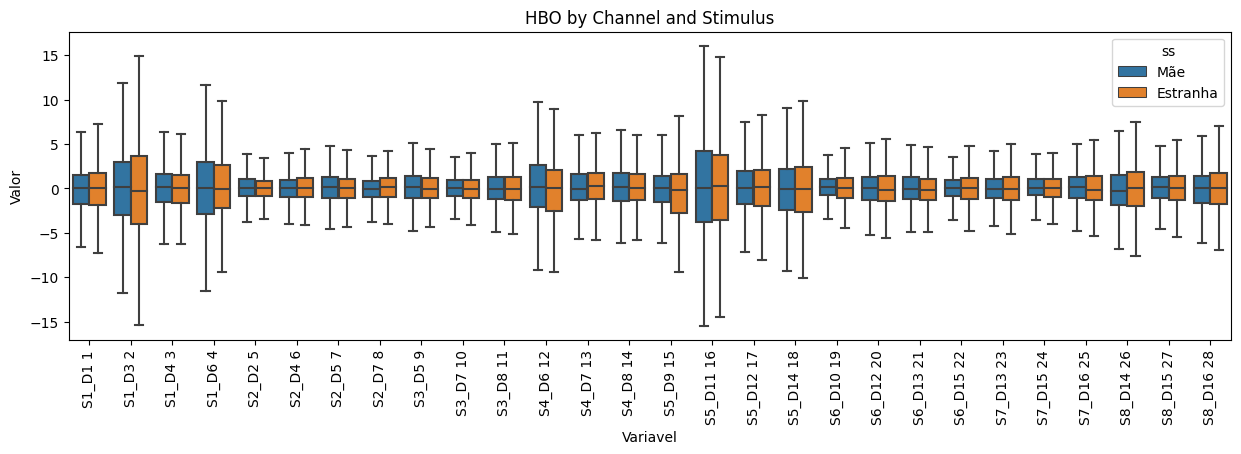

In [45]:
plt.figure(figsize=(15,4))

sns.boxplot(data=df_melted, x='Variavel', y='Valor', hue='ss', showfliers=False)
plt.title('HBO by Channel and Stimulus')
plt.xticks(rotation=90)
plt.show()

In [46]:
df_SD = df[ (df.HB == 'HBT') & (df.ss != 0) ][['subj','obj.t', 'obj.s', 'ss', 'HB', 'S4_D6 12']]
df_SD['t'] = 0
df_SD = df_SD.reset_index(drop=True)
df_SD.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,subj,obj.t,obj.s,ss,HB,S4_D6 12,t
0,2,48.6000,0,Mãe,HBT,1.9491,0
1,2,48.7000,0,Mãe,HBT,2.0040,0
2,2,48.8000,0,Mãe,HBT,2.0740,0
3,2,48.9000,0,Mãe,HBT,2.1599,0
4,2,49.0000,0,Mãe,HBT,2.2634,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


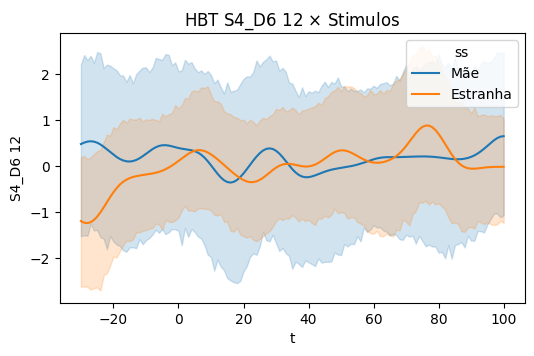

In [47]:
plt.figure(figsize=(6,3.5))

for i in range(len(df_SD)):
  if df_SD.iloc[i]['obj.s'] == 1:
    for j in range(-30,101):
      df_SD.at[i+j,'t'] = j

sns.lineplot(x='t',y=df_SD.columns[-2],hue='ss',data=df_SD)
plt.title('HBT ' + df_SD.columns[-2] + ' $\\times$ Stimulos')

plt.show()

In [48]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,2,48.6000,0,Mãe,HBO,0.1991,-4.1136,-34.6531,-9.9439,-0.4649,...,-0.2917,0.5051,-0.3730,0.7469,-1.0215,-0.2195,-1.1053,-0.3982,0.1417,0.8644
1,2,48.7000,0,Mãe,HBO,0.1960,-4.1915,-34.0244,-10.1589,-0.4986,...,-0.2837,0.5486,-0.3652,0.7719,-1.0189,-0.2187,-1.0744,-0.3681,0.1664,0.7267
2,2,48.8000,0,Mãe,HBO,0.2012,-4.2904,-33.2935,-10.3017,-0.5290,...,-0.2747,0.6002,-0.3588,0.7949,-1.0148,-0.2201,-1.0399,-0.3324,0.1941,0.5537
3,2,48.9000,0,Mãe,HBO,0.2151,-4.4060,-32.4917,-10.3440,-0.5552,...,-0.2656,0.6576,-0.3551,0.8152,-1.0103,-0.2231,-1.0030,-0.2927,0.2236,0.3548
4,2,49.0000,0,Mãe,HBO,0.2377,-4.5315,-31.6578,-10.2653,-0.5759,...,-0.2576,0.7180,-0.3556,0.8320,-1.0062,-0.2272,-0.9654,-0.2510,0.2532,0.1419


In [49]:
for i in range(len(df)):
  if df.iloc[i]['obj.s'] == 1:
    for j in range(-30,101):
      df.at[i+j,'t'] = j



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Mãe') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

df_HBO_HBD.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,subj,obj.t,obj.s,ss,HB,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,...,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28,t
0,2,48.6000,0,Mãe,HBO,0.1991,-4.1136,-34.6531,-9.9439,-0.4649,...,0.5051,-0.3730,0.7469,-1.0215,-0.2195,-1.1053,-0.3982,0.1417,0.8644,-30.0000
1,2,48.7000,0,Mãe,HBO,0.1960,-4.1915,-34.0244,-10.1589,-0.4986,...,0.5486,-0.3652,0.7719,-1.0189,-0.2187,-1.0744,-0.3681,0.1664,0.7267,-29.0000
2,2,48.8000,0,Mãe,HBO,0.2012,-4.2904,-33.2935,-10.3017,-0.5290,...,0.6002,-0.3588,0.7949,-1.0148,-0.2201,-1.0399,-0.3324,0.1941,0.5537,-28.0000
3,2,48.9000,0,Mãe,HBO,0.2151,-4.4060,-32.4917,-10.3440,-0.5552,...,0.6576,-0.3551,0.8152,-1.0103,-0.2231,-1.0030,-0.2927,0.2236,0.3548,-27.0000
4,2,49.0000,0,Mãe,HBO,0.2377,-4.5315,-31.6578,-10.2653,-0.5759,...,0.7180,-0.3556,0.8320,-1.0062,-0.2272,-0.9654,-0.2510,0.2532,0.1419,-26.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


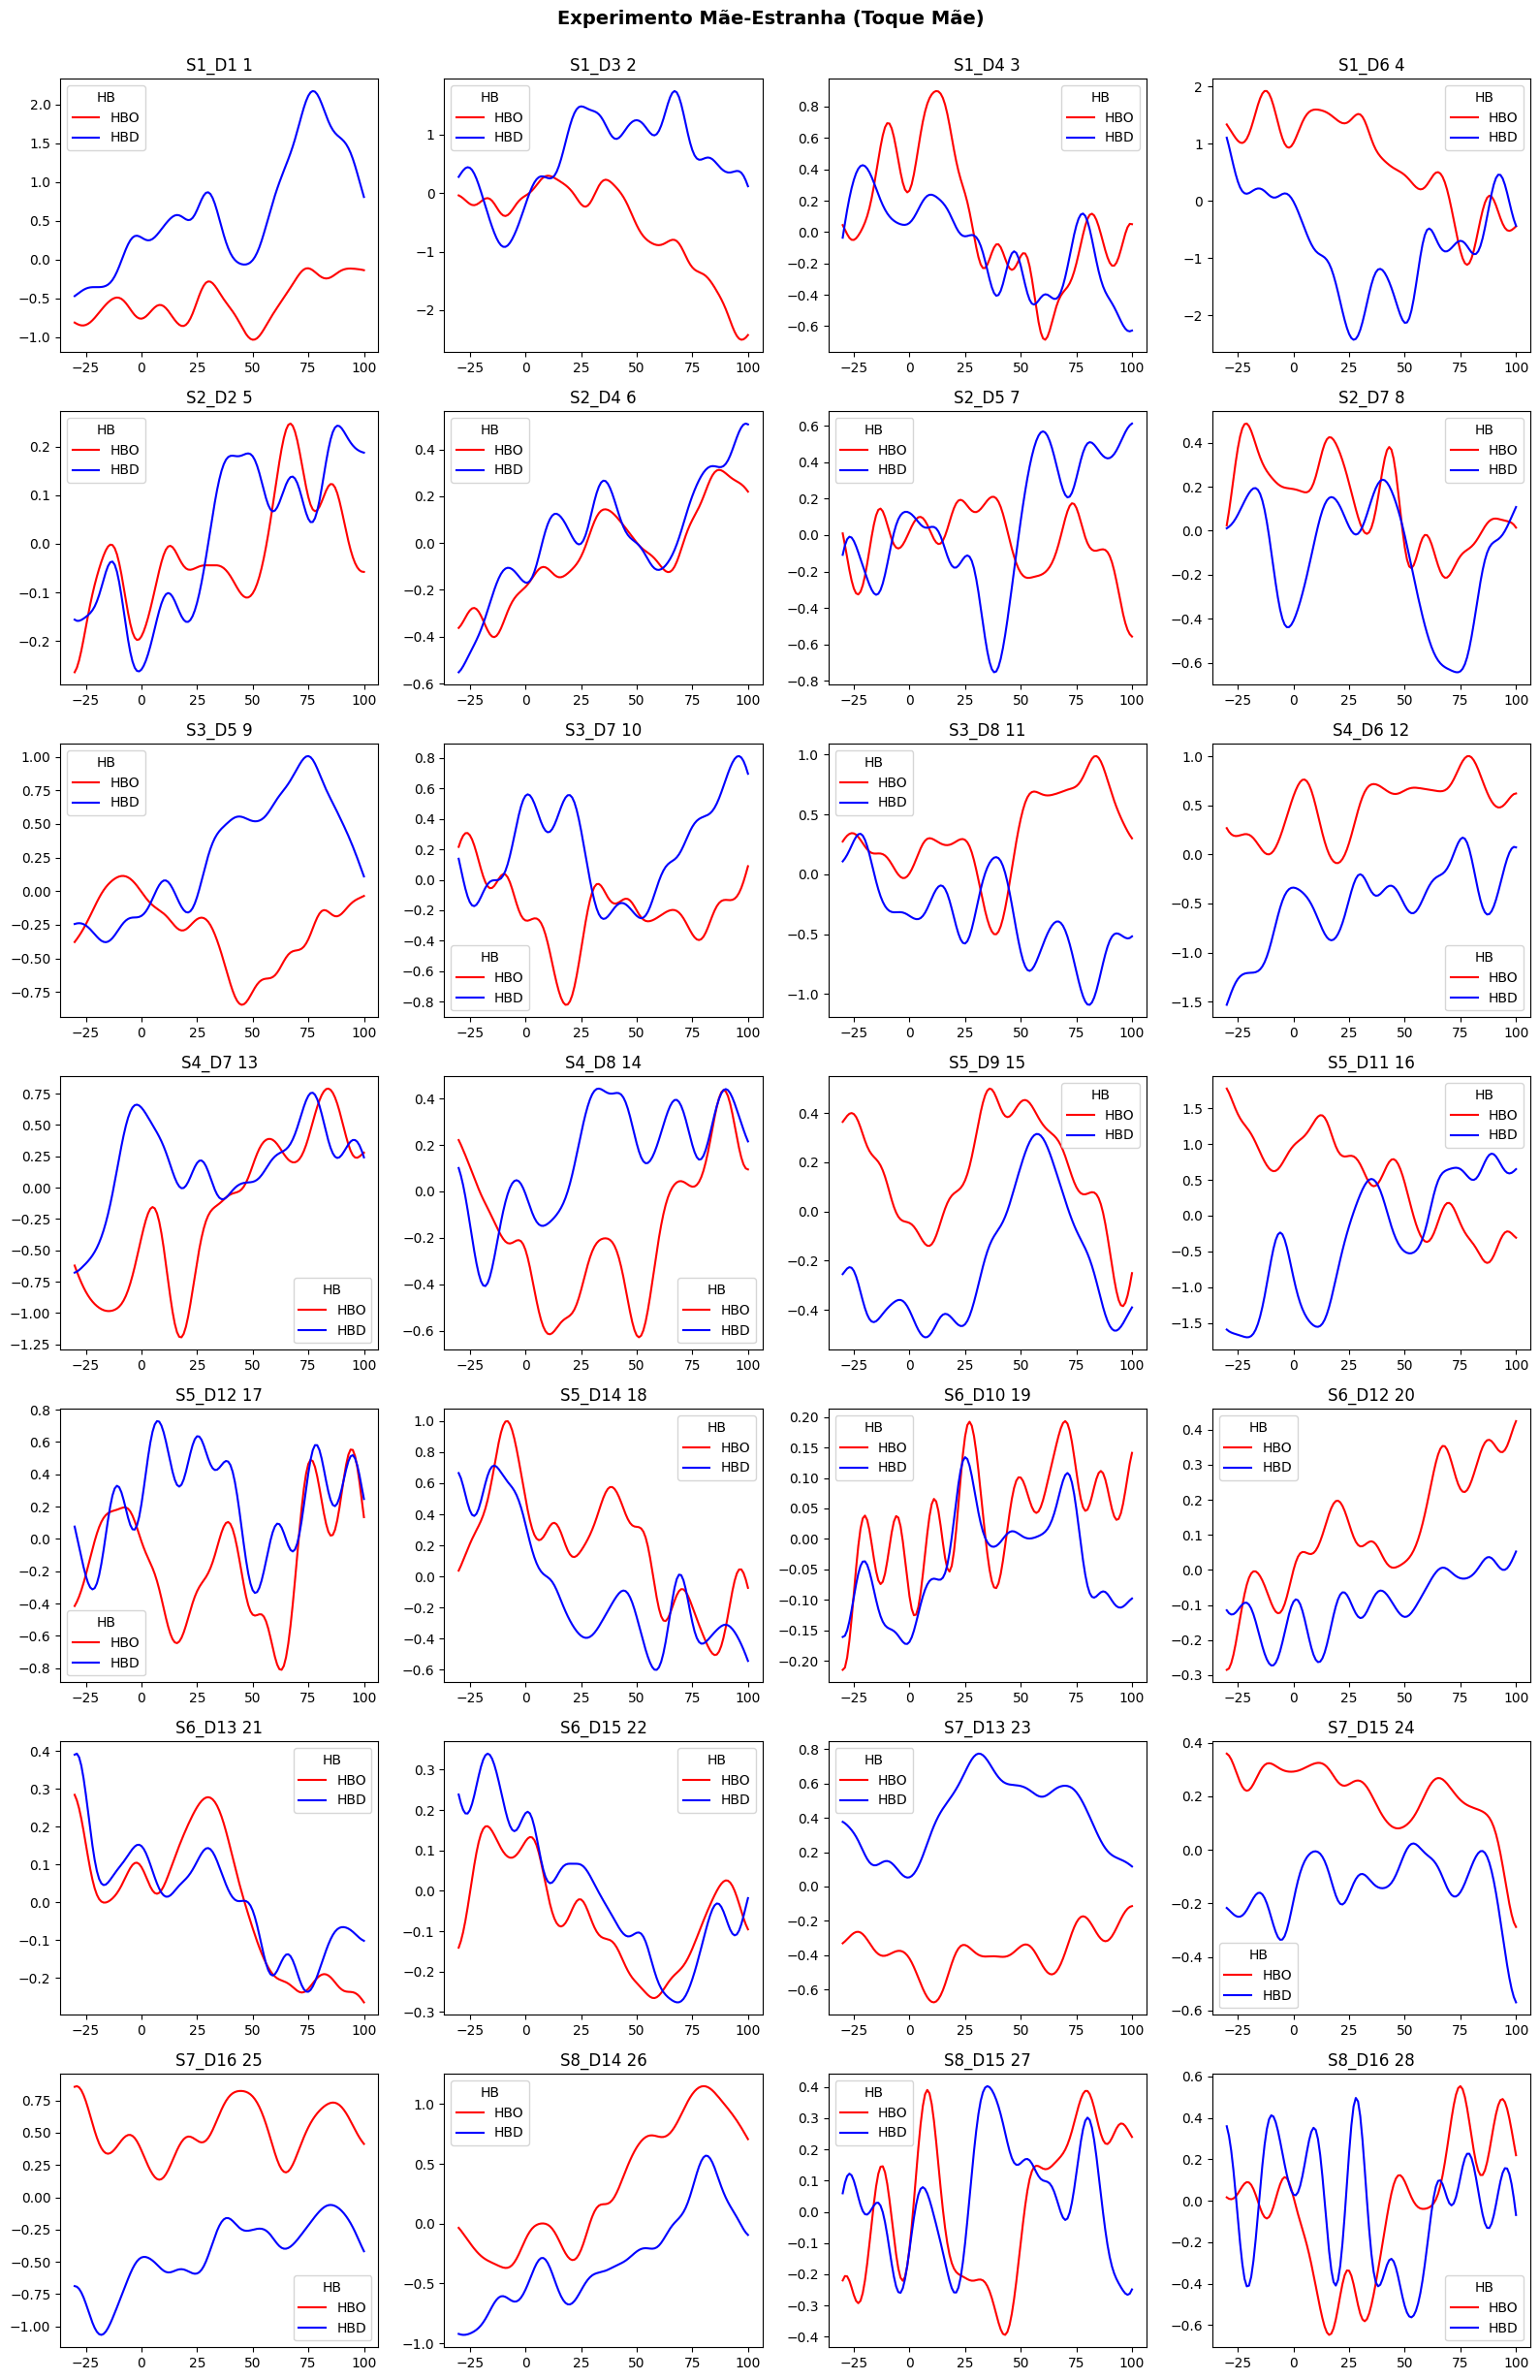

In [51]:
fig, ax = plt.subplots(7,4,figsize=(16,7*3.5))
ax1 = ax.flatten()

for i, col in zip(range(len(df_HBO_HBD.columns[5:-1])),df_HBO_HBD.columns[5:-1]):
  sns.lineplot(x='t',y=df[col],hue='HB',data=df_HBO_HBD,ax=ax1[i],palette={'HBO': 'red', 'HBD': 'blue'},errorbar=None)
  # sns.lineplot(x='t',y=df[col],hue='HB',data=df_HBO_HBD,ax=ax1[i],palette={'HBO': 'red', 'HBD': 'blue'},errorbar=('ci',98)) # ruim pois há intersecção dos intervalos
  ax1[i].set_title(col)
  ax1[i].set_xlabel('')
  ax1[i].set_ylabel('')

plt.suptitle('Experimento Mãe-Estranha (Toque Mãe)',fontsize=14, weight='bold',y=1)
plt.tight_layout()
plt.show()

In [52]:
fig.savefig('HB_toque_mae.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Canais significativamente ativos (teste de hipótese)

Verifica os canais que são **ativados**, isto é, aqueles que satisfazem simultaneamente

$$HBO > baseline (=0), e$$
$$HBD < baseline (=0)$$

de modo significativo ( `pvalue` $< 0.05$ ).



In [53]:
from scipy.stats import ttest_1samp

def gera_df_stats(df_HBO_HBD):

  Channel = []
  Ch_nr = []
  HBO_mean = []
  HBO_t = []
  HBO_p = []
  HBO = []
  HBD_mean = []
  HBD_t = []
  HBD_p = []
  HBD = []

  for col in df_HBO_HBD.columns[5:-1]:
    Channel.append(col.split(' ')[0])
    Ch_nr.append(col.split(' ')[1])

    HBO_mean.append(df_HBO_HBD[df_HBO_HBD.HB == 'HBO'][col].mean())

    t_statistic, p_value = ttest_1samp(df_HBO_HBD[df_HBO_HBD.HB == 'HBO'][col], 0, alternative='greater')
    HBO_t.append(t_statistic)
    HBO_p.append(p_value)
    if p_value < 0.005: HBO.append('***')
    elif p_value < 0.001: HBO.append('**')
    elif p_value < 0.05: HBO.append('*')
    else: HBO.append(' ')

    HBD_mean.append(df_HBO_HBD[df_HBO_HBD.HB == 'HBD'][col].mean())

    t_statistic, p_value = ttest_1samp(df_HBO_HBD[df_HBO_HBD.HB == 'HBD'][col], 0, alternative='less')
    HBD_t.append(t_statistic)
    HBD_p.append(p_value)
    if p_value < 0.005: HBD.append('***')
    elif p_value < 0.001: HBD.append('**')
    elif p_value < 0.05: HBD.append('*')
    else: HBD.append(' ')

  df_stats = pd.DataFrame()
  for col in ['Channel', 'Ch_nr', 'HBO_mean', 'HBO_t', 'HBO_p', 'HBO', 'HBD_mean', 'HBD_t', 'HBD_p', 'HBD']:
    df_stats[col] = eval(col)
    # print(len(eval(col)))

  df_stats['Actived'] = (df_stats.HBO_p < 0.05) & (df_stats.HBD_p < 0.05)

  pd.set_option('display.float_format', lambda x: '%.4f' % x)
  df_stats

  return df_stats



In [54]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

In [55]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Mãe') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

# display(df_HBO_HBD.head())
df_stats_M = gera_df_stats(df_HBO_HBD)
latex_table = gera_df_stats_latex(df_stats_M, 'Tabela: Toque Mãe')
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_M[df_stats_M.Actived == True], 'Tabela: Toque Mãe (somente canais ativados)')
print()
display(Latex(latex_table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [56]:
df_HBO_HBD = df[ (df.HB != 'HBT') &  (df.ss == 'Estranha') ].copy()
df_HBO_HBD = df_HBO_HBD.reset_index(drop=True)

# display(df_HBO_HBD.head())
df_stats_E = gera_df_stats(df_HBO_HBD)
latex_table = gera_df_stats_latex(df_stats_E, 'Tabela: Toque Estranha')
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_E[df_stats_E.Actived == True], 'Tabela: Toque Estranha (somente canais ativados)')
print()
display(Latex(latex_table))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Canais ativos para ambas as situações de toque, 'Mãe' e 'Estranha'

In [57]:
intersection = set(df_stats_M[ df_stats_M.Actived == True ].Channel).intersection(set(df_stats_E[ df_stats_E.Actived == True ].Channel))
print(intersection)


{'S7_D15', 'S8_D15', 'S6_D10', 'S3_D5', 'S1_D3', 'S7_D16'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
latex_table = gera_df_stats_latex(df_stats_M[df_stats_M.Channel.isin(intersection)], 'Tabela: Toque Mãe (somente canais ativados em ambos, para Mãe e Estranha)')
print()
display(Latex(latex_table))

latex_table = gera_df_stats_latex(df_stats_E[df_stats_E.Channel.isin(intersection)], 'Tabela: Toque Estranha (somente canais ativados em ambos, para Mãe e Estranha)')
print()
display(Latex(latex_table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Modelo GLM Simples

$$ y_t \longleftarrow GLM(\text{HB canais}_t) $$

onde,

$y_t$ corresponde a presença de estímulo ou não ao longo do tempo (estímulo pode ser o toque da Mãe ou da Estranha)

$\text{HBO canais}_t$ corresponde a HB (HBO ou HBD) de cada canal ao longo do tempo.

In [59]:
df_M_B_HB = df[ ((df.ss == 'Mãe') | (df.ss == '0')) ].reset_index(drop=True)
df_E_B_HB = df[ ((df.ss == 'Estranha') | (df.ss == '0')) ].reset_index(drop=True)

df_M_B_HB['y'] = df.ss == 'Mãe'
df_M_B_HB['y'] = df_M_B_HB['y'].astype('float')
df_E_B_HB['y'] = df.ss == 'Estranha'
df_E_B_HB['y'] = df_E_B_HB['y'].astype('float')

import statsmodels.api as sm

y = df_M_B_HB[df_M_B_HB.HB == 'HBO']['y']
X = df_M_B_HB[df_M_B_HB.HB == 'HBO'][df_M_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Gaussian())
result_M = model.fit()
print('\n\n GLM - Contato Mãe \n\n')
print(result_M.summary())

y = df_E_B_HB[df_E_B_HB.HB == 'HBO']['y']
X = df_E_B_HB[df_E_B_HB.HB == 'HBO'][df_E_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Gaussian())
result_E = model.fit()
print('\n\n GLM - Contato Mãe \n\n')
print(result_E.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




 GLM - Contato Mãe 


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 9956
Model:                            GLM   Df Residuals:                     9927
Model Family:                Gaussian   Df Model:                           28
Link Function:               Identity   Scale:                         0.22357
Method:                          IRLS   Log-Likelihood:                -6655.3
Date:                Fri, 05 Jan 2024   Deviance:                       2219.4
Time:                        16:06:58   Pearson chi2:                 2.22e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1079
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5578      0

In [60]:
good_M = set(result_M.pvalues[ result_M.pvalues < 0.05 ].index).intersection(result_M.params[ result_M.params > 0 ].index)
good_E = set(result_E.pvalues[ result_E.pvalues < 0.05 ].index).intersection(result_E.params[ result_E.params > 0 ].index)

print('Lista de canais com p < 0.05 para GLM HBO Toque Mãe', list(good_M) )
print('Lista de canais com p < 0.05 para GLM HBO Toque Estranha', list(good_E) )

Lista de canais com p < 0.05 para GLM HBO Toque Mãe ['S2_D4 6', 'S8_D16 28', 'S3_D7 10', 'S6_D12 20', 'S2_D2 5', 'S4_D8 14', 'S3_D8 11', 'S4_D7 13', 'S5_D14 18', 'const', 'S1_D1 1', 'S6_D13 21']
Lista de canais com p < 0.05 para GLM HBO Toque Estranha ['S2_D4 6', 'S2_D5 7', 'S3_D7 10', 'S6_D10 19', 'S5_D12 17', 'S1_D3 2', 'S2_D2 5', 'S7_D13 23', 'S7_D15 24', 'S4_D7 13', 'S1_D4 3', 'const', 'S1_D1 1']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df_result_M = result_M.summary().tables[1]
df_result_E = result_E.summary().tables[1]

df_result_M = pd.DataFrame(df_result_M.data[1::],columns=df_result_M.data[0])
df_result_E = pd.DataFrame(df_result_E.data[1::],columns=df_result_E.data[0])
df_result_M = df_result_M[['', 'coef', 'z', 'P>|z|']]
df_result_E = df_result_E[['', 'coef', 'z', 'P>|z|']]

df_result_M[['Channel','Ch_nr']] = df_result_M[''].str.split(pat=' ', n=1, expand=True)
df_result_E[['Channel','Ch_nr']] = df_result_E[''].str.split(pat=' ', n=1, expand=True)
df_result_M.drop(columns='',inplace=True)
df_result_E.drop(columns='',inplace=True)
df_result_M = df_result_M[['Channel', 'Ch_nr', 'coef', 'z', 'P>|z|']]
df_result_E = df_result_E[['Channel', 'Ch_nr', 'coef', 'z', 'P>|z|']]

df_result_M['P>|z|'] = df_result_M['P>|z|'].astype('float')
df_result_E['P>|z|'] = df_result_E['P>|z|'].astype('float')

glm_latex = gera_df_stats_latex(df_result_M[ df_result_M['P>|z|'] < 0.05 ],'GLM HBO - Toque Mãe - Somente Canais Significativos')
display(Latex(glm_latex))
print()

glm_latex = gera_df_stats_latex(df_result_E[ df_result_E['P>|z|'] < 0.05 ],'GLM HBO - Toque Estranha - Somente Canais Significativos')
display(Latex(glm_latex))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Linear Mixed Effects Model HBO - Toque Mãe

Considerando o agrupamento de cada sujeito.

In [62]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,const,S1_D1 1,S1_D3 2,S1_D4 3,S1_D6 4,S2_D2 5,S2_D4 6,S2_D5 7,S2_D7 8,S3_D5 9,...,S6_D10 19,S6_D12 20,S6_D13 21,S6_D15 22,S7_D13 23,S7_D15 24,S7_D16 25,S8_D14 26,S8_D15 27,S8_D16 28
0,1.0000,-0.0551,1.3606,14.5120,1.1916,0.7768,-0.9127,-1.2646,-0.5768,-1.0123,...,-0.6426,-1.7286,-2.0941,-1.3312,-0.4558,-1.3033,-1.5003,-1.4961,-0.9834,3.1838
1,1.0000,-0.0482,1.3427,14.9331,1.2975,0.7713,-0.9180,-1.2520,-0.5661,-0.9942,...,-0.6288,-1.7111,-2.0908,-1.3041,-0.4513,-1.2988,-1.4857,-1.4897,-0.9799,3.1186
2,1.0000,-0.0410,1.3249,15.3272,1.4012,0.7640,-0.9253,-1.2381,-0.5552,-0.9764,...,-0.6131,-1.6926,-2.0849,-1.2748,-0.4454,-1.2925,-1.4687,-1.4811,-0.9749,3.0551
3,1.0000,-0.0340,1.3082,15.6747,1.5031,0.7541,-0.9351,-1.2225,-0.5444,-0.9602,...,-0.5955,-1.6730,-2.0759,-1.2441,-0.4380,-1.2847,-1.4495,-1.4708,-0.9693,2.9939
4,1.0000,-0.0278,1.2931,15.9722,1.6038,0.7411,-0.9474,-1.2049,-0.5339,-0.9468,...,-0.5759,-1.6526,-2.0633,-1.2127,-0.4296,-1.2754,-1.4283,-1.4594,-0.9643,2.9352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33531,1.0000,1.5400,0.8652,-0.1665,-0.0967,0.5060,-0.6212,-0.5965,0.1637,-1.6731,...,-0.1504,-0.6699,-3.9787,0.0885,-1.5943,-0.9100,-1.0921,-1.9279,-0.2696,-0.4424
33532,1.0000,1.5244,0.9352,-0.1964,-0.1402,0.4812,-0.6456,-0.6081,0.1443,-1.6827,...,-0.2306,-0.7130,-4.0232,0.0288,-1.6624,-0.9217,-1.1103,-1.9312,-0.2678,-0.4667
33533,1.0000,1.5068,0.9970,-0.2259,-0.1835,0.4574,-0.6712,-0.6193,0.1234,-1.6948,...,-0.3078,-0.7559,-4.0509,-0.0270,-1.7198,-0.9334,-1.1260,-1.9371,-0.2675,-0.4907
33534,1.0000,1.4872,1.0472,-0.2558,-0.2267,0.4350,-0.6976,-0.6303,0.1010,-1.7092,...,-0.3801,-0.7975,-4.0618,-0.0783,-1.7656,-0.9444,-1.1387,-1.9458,-0.2693,-0.5146


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y = df_M_B_HB[df_M_B_HB.HB == 'HBO']['y']
X = df_M_B_HB[df_M_B_HB.HB == 'HBO'][df_M_B_HB.columns[5:-2]] # Coloque aqui todas as colunas dos canais que deseja incluir
X = sm.add_constant(X)

model = sm.MixedLM(y,X, groups=df_M_B_HB[df_M_B_HB.HB == 'HBO']["subj"])

result_M = model.fit()

print(result_M.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 9956    Method:             REML     
No. Groups:       16      Scale:              0.0090   
Min. group size:  393     Log-Likelihood:     9046.5548
Max. group size:  917     Converged:          Yes      
Mean group size:  622.2                                
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
const        0.548    0.124   4.408 0.000  0.305  0.792
S1_D1 1      0.005    0.000  15.798 0.000  0.004  0.005
S1_D3 2      0.000    0.000   2.448 0.014  0.000  0.001
S1_D4 3     -0.001    0.000  -4.780 0.000 -0.001 -0.001
S1_D6 4     -0.001    0.000  -7.510 0.000 -0.001 -0.001
S2_D2 5     -0.000    0.001  -0.006 0.995 -0.002  0.002
S2_D4 6      0.002    0.001   3.355 0.001  0.001  0.003
S2_D5 7     -0.002    0.000  -6.645 0.000 -0.003 -0.001
S

In [64]:
df_result_M = result_M.summary().tables[1]
df_result_M = df_result_M.reset_index()

df_result_M = df_result_M[['index', 'Coef.', 'z', 'P>|z|']]

df_result_M[['Channel','Ch_nr']] = df_result_M['index'].str.split(pat=' ', n=1, expand=True)
df_result_M.drop(columns='index',inplace=True)
df_result_M = df_result_M[['Channel', 'Ch_nr', 'Coef.', 'z', 'P>|z|']]
df_result_M = df_result_M.iloc[1:-1]

df_result_M['P>|z|'] = df_result_M['P>|z|'].astype('float')

glm_latex = gera_df_stats_latex(df_result_M[ df_result_M['P>|z|'] < 0.05 ],'Linear Mixed Effects Model HBO - Toque Mãe (pvalue < 0.05)')
display(Latex(glm_latex))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>